# Guía Data Science - Numpy, Pandas, SQL

En esta guía veremos algunos conceptos básicos que se necesitan para el manejo de datos. Comenzaremos con una pequeña introducción a ``numpy``, luego aprenderemos un poco sobre ``pandas`` y finalmente utilizaremos datos externos y los procesaremos con SQL.

Te recomendamos correr este notebook en google colab para que no tengas que instalar nada en tu computador. Para subir los archivos `comunas.db` y `Resultados_Pleb.csv` que utilizaremos más adelante de la siguiente forma: 

- Si los tienes descargados, puedes subirlos en la sección de Archivos (hay un ícono de carpeta en el menú del lado izquierdo).
- Si no los tienes descargados, puedes acceder a los archivos en github utilizando el siguiente comando en una celda del notebook:
```
!wget  [link a github donde se encuentra el archivo]
```
Por ejemplo
```
!wget  https://github.com/IIC2413/Syllabus-2021-1/raw/main/Controles/Control%202/tu_shop_mini.db
```

## 1. Numpy

`NumPy` es una librería para hacer computos numéricos en Python y la necesitamos conocer (en concreto, el manejo de arreglos) para poder entender el funcionamiento de `pandas`. Es la base de muchas otras librerías científicas. Entre otras cosas, nos permite:

- Utilizar arreglos multidimensionales.
- Utilizar funciones matemáticas.
- Utilizar herramientas de álgebra lineal.

Para comenzar a trabajar vamos a importar la librería y crear un pequeño arreglo de elementos aleatorios.

In [1]:
import numpy as np

data = np.random.randn(2,4)
data

array([[-2.19994153, -1.40876017,  0.74589012,  1.5840807 ],
       [ 0.47803117, -1.35987555,  1.39891381,  0.29880645]])

A diferencia de una lista, podemos hacer operaciones matriciales, como multiplicar el arreglo `data` por un escalar:

In [2]:
data*10

array([[-21.99941533, -14.08760172,   7.45890121,  15.84080698],
       [  4.78031171, -13.59875552,  13.98913805,   2.98806449]])

o sumarle una matriz:

In [3]:
data + data

array([[-4.39988307, -2.81752034,  1.49178024,  3.1681614 ],
       [ 0.95606234, -2.7197511 ,  2.79782761,  0.5976129 ]])

También podemos crear arreglos a partir de una lista:

In [4]:
list1 = [1, 1, 2, 3, 5]
arr1 = np.array(list1)
arr1

array([1, 1, 2, 3, 5])

In [5]:
list2 = [[1, 1, 2, 3], [5, 8, 13, 21]]
arr2 =np.array(list2)
arr2

array([[ 1,  1,  2,  3],
       [ 5,  8, 13, 21]])

Para preguntar el número de dimensiones en un arreglo utilizamos `ndim` y para preguntar los tamaños de cada una de esas dimensiones utilizamos `shape` (por ejemplo, pensar en arr2 como una matriz de 2 x 4).

In [6]:
arr2.ndim

2

In [7]:
arr2.shape

(2, 4)

Para acceder a un elemento:

In [8]:
arr1[2]

2

In [9]:
arr2[1][2]

13

También podemos acceder de la siguiente forma:

In [10]:
arr2[1, 2]

13

Y los arreglos son mutables

In [11]:
arr2[1, 2] = 100
arr2

array([[  1,   1,   2,   3],
       [  5,   8, 100,  21]])

También tenemos un equivalente a `range` llamado `arange`, pero que genera un arreglo.

In [12]:
np.arange(11)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [13]:
np.arange(2,6)

array([2, 3, 4, 5])

Por último, también podemos utilizar comparaciones booleanas con los arreglos:

In [14]:
arr = np.array([0, 0, 1, 1, 2, 2])
arr == 1

array([False, False,  True,  True, False, False])

El resultado de esta comparación punto a punto es un arreglo de valores booleanos. Este arreglo se puede usar para acceder a valores en otros arreglos, de forma que solo nos quedamos con los valores indicados como *true*. Vamos a crear un arreglo multidimensional e ingresar el arreglo anterior como índice:

In [15]:
arr2 = np.random.randn(6, 3)
arr2

array([[-0.48032123,  0.00953359, -0.23907274],
       [-2.87863995,  0.41912901, -0.11611594],
       [-1.68163213, -0.43449185,  0.32251911],
       [-0.08358578, -0.36352987, -0.60483356],
       [ 1.2254156 , -1.7092889 ,  0.81099188],
       [ 0.29912824,  0.27621991,  0.37661032]])

In [16]:
arr == 1

array([False, False,  True,  True, False, False])

Entoncers me voy a quedar con las filas 2 y 3.

In [17]:
arr2[arr == 1]

array([[-1.68163213, -0.43449185,  0.32251911],
       [-0.08358578, -0.36352987, -0.60483356]])

Y también podemos negar la condición:

In [18]:
arr2[~(arr == 1)]

array([[-0.48032123,  0.00953359, -0.23907274],
       [-2.87863995,  0.41912901, -0.11611594],
       [ 1.2254156 , -1.7092889 ,  0.81099188],
       [ 0.29912824,  0.27621991,  0.37661032]])

A los arreglos booleanos, comunmente se les llama máscaras (_boolean mask_).

## 2. Pandas 

En esta segunda parte estudiaremos la herramienta de análisis de datos `pandas`, una librería que permite hacer análisis y limpieza de datos en Python. Está diseñada para trabajar con datos tabulares y heterogéneos. También es utilizada en conjunto con otras herramientas para hacer *Data Science* como `NumPy`, `SciPy`, `matplotlib` y `scikit-learn`.

Partimos importando la librería:

In [19]:
import pandas as pd

### 2.1 Series

Vamos a partir instanciando objetos de tipo `Series`. Estos objetos son como arreglos unidimensionales, solo que su índice es más explícito.

In [20]:
obj = pd.Series([1, 3, -4, 7])
obj

0    1
1    3
2   -4
3    7
dtype: int64

In [21]:
obj[0]

1

In [22]:
obj = pd.Series(['string', 3, -4, 7])
obj

0    string
1         3
2        -4
3         7
dtype: object

Para un objeto de tipo `Series` podemos agregar un label a sus índices.

In [23]:
obj = pd.Series([1, 3, -4, 7], index=['d', 'c', 'b', 'a'])
obj

d    1
c    3
b   -4
a    7
dtype: int64

In [24]:
obj['c']

3

In [25]:
obj[0]

1

Podemos seleccionar varios elementos según el label de su índice o su posición.

In [26]:
obj[['c', 'a']]

c    3
a    7
dtype: int64

In [27]:
obj[[0, 2]]

d    1
b   -4
dtype: int64

Podemos hacer filtros pasando un arreglo de *booleanos*:

In [28]:
obj[obj > 2]

c    3
a    7
dtype: int64

Recordemos lo que significaba la comparación `obj > 2` en `NumPy`. Genera una máscara con el mismo largo que `obj` que tenía el valor `True` en todas las posiciones con valor mayor a 2.

In [29]:
obj > 2

d    False
c     True
b    False
a     True
dtype: bool

Por lo que en `obj[obj > 2]` se muestran sólo las filas en la que el arreglo anterior era `True`.

Finalmente, podemos crear un objeto `Series` a partir de un diccionario. Supongamos el siguiente diccionario de personas junto a su edad.

In [30]:
people = {'Alice': 20, 'Bob': 17, 'Charles': 23, 'Dino': 50}
people_series = pd.Series(people)
people_series

Alice      20
Bob        17
Charles    23
Dino       50
dtype: int64

### 2.2 DataFrame

Un objeto de tipo `DataFrame` representa una tabla, en que cada una de sus columnas representa un tipo. Vamos a construir una tabla a partir de un diccionario.

In [31]:
reg_chile = {'name': ['Metropolitana', 'Valparaiso', 'Biobío', 'Maule', 'Araucanía', 'O\'Higgins'],
             'pop': [7112808, 1815902, 1538194, 1044950, 957224, 914555],
             'pib': [24850, 14510, 13281, 12695, 11064, 14840]}
frame = pd.DataFrame(reg_chile)
frame

,name,pop,pib
0,Metropolitana,7112808,24850
1,Valparaiso,1815902,14510
2,Biobío,1538194,13281
3,Maule,1044950,12695
4,Araucanía,957224,11064
5,O'Higgins,914555,14840


Podemos usar la función `head` para tener sólo las 5 primeras columnas del Data Frame. En este caso no es mucho aporte, pero para un Data Frame más grande no puede servir para ver cómo vienen los datos.

In [32]:
frame.head()

,name,pop,pib
0,Metropolitana,7112808,24850
1,Valparaiso,1815902,14510
2,Biobío,1538194,13281
3,Maule,1044950,12695
4,Araucanía,957224,11064


In [33]:
frame.head(2)

,name,pop,pib
0,Metropolitana,7112808,24850
1,Valparaiso,1815902,14510


Podemos proyectar valores pasando el nombre de las columnas que deseamos dejar.

In [34]:
frame['name']

0    Metropolitana
1       Valparaiso
2           Biobío
3            Maule
4        Araucanía
5        O'Higgins
Name: name, dtype: object

In [35]:
frame[['name']]

,name
0,Metropolitana
1,Valparaiso
2,Biobío
3,Maule
4,Araucanía
5,O'Higgins


In [36]:
frame[['name', 'pop']]

,name,pop
0,Metropolitana,7112808
1,Valparaiso,1815902
2,Biobío,1538194
3,Maule,1044950
4,Araucanía,957224
5,O'Higgins,914555


Podemos seleccionar una determinada fila con la función `iloc`.

In [37]:
frame.iloc[2]

name     Biobío
pop     1538194
pib       13281
Name: 2, dtype: object

Podemos utilizar la misma idea de filtros vista anteriormente. Por ejemplo, vamos a dejar sólamente las columnas con población mayor a 1.000.000. ¿Te suena esto a algún otro lenguaje que viste este semestre?

In [38]:
frame[frame['pop'] > 1000000]

,name,pop,pib
0,Metropolitana,7112808,24850
1,Valparaiso,1815902,14510
2,Biobío,1538194,13281
3,Maule,1044950,12695


Podemos hacer filtros con `&` para hacer un `AND`:

In [39]:
frame[(frame['pop'] > 1000000) & (frame['pib'] < 20000)]

,name,pop,pib
1,Valparaiso,1815902,14510
2,Biobío,1538194,13281
3,Maule,1044950,12695


Y podemos usar `|` para hacer un `OR`:

In [40]:
frame[(frame['name'] == 'Metropolitana') | (frame['name'] == 'Valparaiso')]

,name,pop,pib
0,Metropolitana,7112808,24850
1,Valparaiso,1815902,14510


Para ordenar un objeto `DataFrame` usamos la función `sort_values`:

In [41]:
frame.sort_values(by='pib')

,name,pop,pib
4,Araucanía,957224,11064
3,Maule,1044950,12695
2,Biobío,1538194,13281
1,Valparaiso,1815902,14510
5,O'Higgins,914555,14840
0,Metropolitana,7112808,24850


In [42]:
frame.sort_values(by='pib', ascending=False)

,name,pop,pib
0,Metropolitana,7112808,24850
5,O'Higgins,914555,14840
1,Valparaiso,1815902,14510
2,Biobío,1538194,13281
3,Maule,1044950,12695
4,Araucanía,957224,11064


Si necesitamos ordenar por más de una columna, podemos pasar un arreglo al argumento `by`. Existen muchas formas de crear y operar sobre un `DataFrame`. Puedes revisar la documentación para encontrar más.

La librería `pandas` tiene varias funciones que nos permiten obtener descripciones y resúmenes de los datos. Vamos a ver algunos ejemplos.

In [43]:
frame.describe()

,pop,pib
count,6.000000e+00,6.000000
mean,2.230606e+06,15206.666667
std,2.418536e+06,4915.119843
min,9.145550e+05,11064.000000
25%,9.791555e+05,12841.500000
50%,1.291572e+06,13895.500000
75%,1.746475e+06,14757.500000
max,7.112808e+06,24850.000000


In [44]:
frame.mean()

pop    2.230606e+06
pib    1.520667e+04
dtype: float64

In [45]:
frame.sum()

name    MetropolitanaValparaisoBiobíoMauleAraucaníaO'H...
pop                                              13383633
pib                                                 91240
dtype: object

Podemos cargar datos de un csv de la siguiente forma:

In [46]:
df = pd.read_csv('Resultados_Pleb.csv') 
df.head()

,cod_com,Apruebo,Rechazo,Blancos,Nulos
0,1101,60976,18855,114,275
1,1107,21373,4608,46,102
2,1401,3730,1076,8,29
3,1402,293,207,2,11
4,1403,131,374,3,16


Puedes pasarle como argumento `sep=algun_string` para cambiar el separador del csv. Por ejemplo si el archivo tuviera separación con `;`, podrías hacer algo como:

```py
df = pd.read_csv('Resultados_Pleb.csv', sep=';') 
```

Si nos quiséramos quedar con algunas columnas, pero no queremos hacer cambios permanentes, podemos guardar la información en un nuevo dataframe:

In [47]:
df2 = df[['cod_com', 'Apruebo']]
df2

,cod_com,Apruebo
0,1101,60976
1,1107,21373
2,1401,3730
3,1402,293
4,1403,131
...,...,...
341,16301,12268
342,16302,4420
343,16303,2003
344,16304,1364


In [48]:
df

,cod_com,Apruebo,Rechazo,Blancos,Nulos
0,1101,60976,18855,114,275
1,1107,21373,4608,46,102
2,1401,3730,1076,8,29
3,1402,293,207,2,11
4,1403,131,374,3,16
...,...,...,...,...,...
341,16301,12268,5729,42,89
342,16302,4420,2737,25,47
343,16303,2003,1228,10,17
344,16304,1364,516,7,12


Pero si quisiéramos cambiar el dataframe de forma permanente podemos hacerlo así:

In [49]:
df = df[['cod_com', 'Apruebo']]
df

,cod_com,Apruebo
0,1101,60976
1,1107,21373
2,1401,3730
3,1402,293
4,1403,131
...,...,...
341,16301,12268
342,16302,4420
343,16303,2003
344,16304,1364


Cuando cargas datos desde un csv, puede que quieras saber los tipos de datos:

In [50]:
df.dtypes

cod_com    int64
Apruebo    int64
dtype: object

Existen algunos comandos que puedes buscar para pasar datos que son string a números, etc...

## 3. Utilizando datos externos y SQL

Para analizar datos y aprender como trabajar con SQL, usaremos la base de datos `comunas.db` que usa el siguiente esquema: 

````
Comunas(cod INT PRIMARY KEY, 
        nombre VARCHAR(200), 
        provincia VARCHAR(200), 
        region VARCHAR(200), 
        superficie FLOAT, 
        poblacion INT, 
        densidad FLOAT, 
        idh FLOAT)
```


In [51]:
import sqlite3

conn = sqlite3.connect('comunas.db')
conn.text_factory = lambda x: str(x, 'utf-8')
curr = conn.cursor()

Ahora que hemos realizado la conexión,  usaremos una consulta SQL para extraer los datos y guardarlos en un dataframe. Comúnmente la idea es preparar los datos con SQL y extraer a pandas solo lo necesario.

In [52]:
curr.execute("SELECT * FROM Comunas;")
com_frame = pd.DataFrame(curr.fetchall())
com_frame

,0,1,2,3,4,5,6,7
0,15101,Arica,Arica,Arica y Parinacota,4799.4,210936,736.0,38.40
1,15102,Camarones,Arica,Arica y Parinacota,3927.0,679,0.3,751.00
2,15201,Putre,Parinacota,Arica y Parinacota,5902.5,1462,0.2,707.00
3,15202,General Lagos,Parinacota,Arica y Parinacota,2244.4,739,0.5,0.67
4,1101,Iquique,Iquique,Tarapacá,2242.1,184953,82.4,766.00
...,...,...,...,...,...,...,...,...
341,13601,Talagante,Talagante,Metropolitana de Santiago,126.0,78887,474.6,749.00
342,13602,El Monte,Talagante,Metropolitana de Santiago,118.0,32468,224.2,688.00
343,13603,Isla de Maipo,Talagante,Metropolitana de Santiago,189.0,33723,136.5,724.00
344,13604,Padre Hurtado,Talagante,Metropolitana de Santiago,80.8,50696,626.2,728.00


In [53]:
com_frame.head()

,0,1,2,3,4,5,6,7
0,15101,Arica,Arica,Arica y Parinacota,4799.4,210936,736.0,38.40
1,15102,Camarones,Arica,Arica y Parinacota,3927.0,679,0.3,751.00
2,15201,Putre,Parinacota,Arica y Parinacota,5902.5,1462,0.2,707.00
3,15202,General Lagos,Parinacota,Arica y Parinacota,2244.4,739,0.5,0.67
4,1101,Iquique,Iquique,Tarapacá,2242.1,184953,82.4,766.00


Renombremos los nombres de las columnas del dataframe según nuestro esquema:

In [54]:
com_frame.rename(columns = { 0: 'cod', 1: 'nombre', 2: 'provincia', 3: 'region', 
                            4: 'superficie', 5: 'poblacion', 6: 'densidad', 7: 'idh'}, inplace=True)

Usemos `head` y `describe` para tener una mejor idea de como se ven nuestros datos:

In [55]:
com_frame.head(10)

,cod,nombre,provincia,region,superficie,poblacion,densidad,idh
0,15101,Arica,Arica,Arica y Parinacota,4799.4,210936,736.0,38.40
1,15102,Camarones,Arica,Arica y Parinacota,3927.0,679,0.3,751.00
2,15201,Putre,Parinacota,Arica y Parinacota,5902.5,1462,0.2,707.00
3,15202,General Lagos,Parinacota,Arica y Parinacota,2244.4,739,0.5,0.67
4,1101,Iquique,Iquique,Tarapacá,2242.1,184953,82.4,766.00
5,1107,Alto Hospicio,Iquique,Tarapacá,572.9,94455,87.6,NaN
6,1401,Pozo Almonte,Tamarugal,Tarapacá,13765.8,11519,0.7,722.00
7,1402,Camiña,Tamarugal,Tarapacá,2200.2,1156,0.5,619.00
8,1403,Colchane,Tamarugal,Tarapacá,4015.6,1384,0.4,603.00
9,1404,Huara,Tamarugal,Tarapacá,10474.6,2360,0.2,676.00


In [56]:
com_frame.describe()

,cod,superficie,poblacion,densidad,idh
count,346.000000,3.460000e+02,346.000000,346.000000,341.000000
mean,8563.156069,5.815967e+03,50407.078035,884.646821,637.527654
std,3356.540795,6.727407e+04,86926.943488,2668.330303,188.322684
min,1101.000000,7.000000e+00,127.000000,0.000000,0.510000
25%,6109.250000,2.513000e+02,9148.500000,9.325000,637.000000
50%,8313.500000,6.331500e+02,17688.000000,26.100000,672.000000
75%,11176.250000,1.657500e+03,50747.000000,89.575000,719.000000
max,15202.000000,1.250258e+06,805000.000000,15667.000000,949.000000


En esta tabla tenemos valores nulos. Vamos a buscarlos. Primero vamos a encontrar todas las filas que contengan algún nulo, para luego filtrar por ese arreglo.

In [57]:
com_frame.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
341    False
342    False
343    False
344    False
345    False
Length: 346, dtype: bool

In [58]:
com_frame[com_frame.isnull().any(axis=1)]

,cod,nombre,provincia,region,superficie,poblacion,densidad,idh
5,1107,Alto Hospicio,Iquique,Tarapacá,572.9,94455,87.6,NaN
177,8112,Hualpén,Concepción,Biobío,53.5,86176,1610.8,NaN
198,8314,Alto Biobío,Biobío,Biobío,2124.6,10039,4.7,NaN
219,9121,Cholchol,Cautín,La Araucanía,427.9,10825,25.3,NaN
288,12202,Antártica,Antártica Chilena,Magallanes y Antártica Chilena,1250257.6,127,0.0,NaN


`pandas` tiene métodos auxiliares para lidiar con datos faltantes. Uno es eliminar aquellas filas con la función `dropna()`

In [59]:
com_cleaned = com_frame.dropna()
com_cleaned

,cod,nombre,provincia,region,superficie,poblacion,densidad,idh
0,15101,Arica,Arica,Arica y Parinacota,4799.4,210936,736.0,38.40
1,15102,Camarones,Arica,Arica y Parinacota,3927.0,679,0.3,751.00
2,15201,Putre,Parinacota,Arica y Parinacota,5902.5,1462,0.2,707.00
3,15202,General Lagos,Parinacota,Arica y Parinacota,2244.4,739,0.5,0.67
4,1101,Iquique,Iquique,Tarapacá,2242.1,184953,82.4,766.00
...,...,...,...,...,...,...,...,...
341,13601,Talagante,Talagante,Metropolitana de Santiago,126.0,78887,474.6,749.00
342,13602,El Monte,Talagante,Metropolitana de Santiago,118.0,32468,224.2,688.00
343,13603,Isla de Maipo,Talagante,Metropolitana de Santiago,189.0,33723,136.5,724.00
344,13604,Padre Hurtado,Talagante,Metropolitana de Santiago,80.8,50696,626.2,728.00


O podemos tomar una opción menos radical, que es reemplazar los nulos por un valor en particular.

In [60]:
com_frame = com_frame.fillna(0)
com_frame

,cod,nombre,provincia,region,superficie,poblacion,densidad,idh
0,15101,Arica,Arica,Arica y Parinacota,4799.4,210936,736.0,38.40
1,15102,Camarones,Arica,Arica y Parinacota,3927.0,679,0.3,751.00
2,15201,Putre,Parinacota,Arica y Parinacota,5902.5,1462,0.2,707.00
3,15202,General Lagos,Parinacota,Arica y Parinacota,2244.4,739,0.5,0.67
4,1101,Iquique,Iquique,Tarapacá,2242.1,184953,82.4,766.00
...,...,...,...,...,...,...,...,...
341,13601,Talagante,Talagante,Metropolitana de Santiago,126.0,78887,474.6,749.00
342,13602,El Monte,Talagante,Metropolitana de Santiago,118.0,32468,224.2,688.00
343,13603,Isla de Maipo,Talagante,Metropolitana de Santiago,189.0,33723,136.5,724.00
344,13604,Padre Hurtado,Talagante,Metropolitana de Santiago,80.8,50696,626.2,728.00


Existen muchas otras opciones para limpiar los datos, pero no son parte de esta guía.

Ahora, veamos algunos ejemplos de agregación de datos utilizando `pandas`. Lo primero que haremos será cambiar el nombre de las columnas del Data Frame con método diferente al que utilizamos anteriormente.

In [61]:
com_frame.columns = ['cod', 'nombre', 'prov', 'reg', 'sup', 'pobl', 'dens', 'idh']
com_frame

,cod,nombre,prov,reg,sup,pobl,dens,idh
0,15101,Arica,Arica,Arica y Parinacota,4799.4,210936,736.0,38.40
1,15102,Camarones,Arica,Arica y Parinacota,3927.0,679,0.3,751.00
2,15201,Putre,Parinacota,Arica y Parinacota,5902.5,1462,0.2,707.00
3,15202,General Lagos,Parinacota,Arica y Parinacota,2244.4,739,0.5,0.67
4,1101,Iquique,Iquique,Tarapacá,2242.1,184953,82.4,766.00
...,...,...,...,...,...,...,...,...
341,13601,Talagante,Talagante,Metropolitana de Santiago,126.0,78887,474.6,749.00
342,13602,El Monte,Talagante,Metropolitana de Santiago,118.0,32468,224.2,688.00
343,13603,Isla de Maipo,Talagante,Metropolitana de Santiago,189.0,33723,136.5,724.00
344,13604,Padre Hurtado,Talagante,Metropolitana de Santiago,80.8,50696,626.2,728.00


Para obtener la cantidad de habitantes por región haremos lo siguiente:

In [62]:
com_frame['pobl'].groupby(com_frame['reg']).sum() # Ojo! esto retorna un objeto Series

reg
Antofagasta                             551627
Arica y Parinacota                      213816
Atacama                                 292054
Aysén del Gral. C. Ibáñez del Campo     106893
Biobío                                 1565839
Coquimbo                                714856
La Araucanía                            933537
Lib. Gral. Bernardo O'Higgins           903248
Los Lagos                               835829
Los Ríos                                380618
Magallanes y Antártica Chilena          158828
Maule                                  1073635
Metropolitana de Santiago              7090580
Tarapacá                                300021
Valparaíso                             1859312
Ñuble                                   460156
Name: pobl, dtype: int64

Podemos preguntar cuántos elementos hay por grupo. En este caso obtendríamos el número de comunas por región.

In [63]:
com_frame['pobl'].groupby(com_frame['reg']).size() # Ojo! esto retorna un objeto Series

reg
Antofagasta                             9
Arica y Parinacota                      4
Atacama                                 9
Aysén del Gral. C. Ibáñez del Campo    10
Biobío                                 33
Coquimbo                               15
La Araucanía                           32
Lib. Gral. Bernardo O'Higgins          33
Los Lagos                              30
Los Ríos                               12
Magallanes y Antártica Chilena         11
Maule                                  30
Metropolitana de Santiago              52
Tarapacá                                7
Valparaíso                             38
Ñuble                                  21
Name: pobl, dtype: int64

Tambien podemos hacer varias agregaciones a la vez, retornando un solo data frame:

In [64]:
com_frame.groupby(['reg']).agg({'idh':['mean','std'], 'dens':['mean','std']})

idh                     dens  \
                                           mean         std         mean   
reg                                                                        
Antofagasta                          574.046667  326.844732     3.155556   
Arica y Parinacota                   374.267500  410.292726   184.250000   
Atacama                              715.333333   36.800136     3.766667   
Aysén del Gral. C. Ibáñez del Campo  669.700000   49.893331     1.220000   
Biobío                               620.121212  166.558128   273.112121   
Coquimbo                             642.978000  182.061179    26.546667   
La Araucanía                         603.144688  164.238217   277.856250   
Lib. Gral. Bernardo O'Higgins        608.972121  197.272731    85.242424   
Los Lagos                            534.399333  272.921944    29.293333   
Los Ríos                             654.500000   37.449360    24.241667   
Magallanes y Antártica Chilena       624.339091  310.754763     0.781818   
Maule                                594.268667  202.909354    62.016667   
Metropolitana de Santiago            709.735962  190.098669  5178.384615   
Tarapacá                             597.000000  272.571703    24.628571   
Valparaíso                           681.274474  165.196975   283.600000   
Ñuble                                597.028095  142.594157    42.714286   

                                                  
                                             std  
reg                                               
Antofagasta                             3.993780  
Arica y Parinacota                    367.833354  
Atacama                                 3.693914  
Aysén del Gral. C. Ibáñez del Campo     2.080491  
Biobío                                516.024530  
Coquimbo                               45.822294  
La Araucanía                         1416.568029  
Lib. Gral. Bernardo O'Higgins         145.693909  
Los Lagos                              39.594130  
Los Ríos                               36.565619  
Magallanes y Antártica Chilena          2.009885  
Maule                                 166.123751  
Metropolitana de Santiago            4932.171105  
Tarapacá                               41.269146  
Valparaíso                            538.640550  
Ñuble                                  72.390333

El comando de arriba retorna un df multi nivel :O! los cuales son un poco más complejos de trabajar.

Como pueden ver en `pandas` se pueden hacer operaciones mucho más complejas, pero no veremos nada avanzado en esta ocasión. Puedes revisar la documentación para ver que más puedes hacer.

Podemos agregar columnas al df basadas en las otras columnas mediante el método `apply`

In [65]:
com_frame['computed_density'] = com_frame.apply(lambda row: row.pobl / row.sup, axis=1)
com_frame.head()

,cod,nombre,prov,reg,sup,pobl,dens,idh,computed_density
0,15101,Arica,Arica,Arica y Parinacota,4799.4,210936,736.0,38.40,43.950494
1,15102,Camarones,Arica,Arica y Parinacota,3927.0,679,0.3,751.00,0.172906
2,15201,Putre,Parinacota,Arica y Parinacota,5902.5,1462,0.2,707.00,0.247692
3,15202,General Lagos,Parinacota,Arica y Parinacota,2244.4,739,0.5,0.67,0.329264
4,1101,Iquique,Iquique,Tarapacá,2242.1,184953,82.4,766.00,82.490968


Se puede hacer merge (join) de dos dataframes de la siguiente forma:

```py
df = df1.merge(df2, left_on='atributo_df1', right_on='atributo_df2')
```

Una de las ventajas de trabajar con `pandas` es que tenemos acceso rápido a herramientas de visualización. Vamos a ver un ejemplo rápido, haciendo un gráfico para ver la correlación entre superficie y población.

<AxesSubplot:xlabel='sup', ylabel='pobl'>

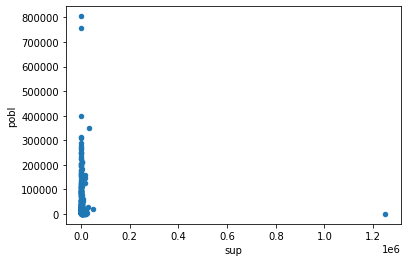

In [66]:
com_frame.plot.scatter(x='sup', y='pobl')

Necesitamos limpiar los _outliers_ (datos muy alejados de lo "normal") para ver mejor el gráfico:

<AxesSubplot:xlabel='sup', ylabel='pobl'>

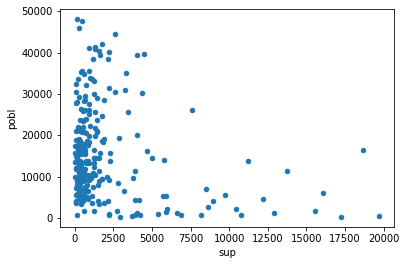

In [67]:
com_frame[(com_frame['sup'] < 20000) & (com_frame['pobl'] < 50000)].plot.scatter(x='sup', y='pobl')

También podemos calcular correlación entre las columnas que tengan valores numéricos:

In [68]:
com_frame.corr()

,cod,sup,pobl,dens,idh,computed_density
cod,1.000000,0.050524,0.181746,0.385462,0.025923,0.387854
sup,0.050524,1.000000,-0.033911,-0.028369,-0.162453,-0.028657
pobl,0.181746,-0.033911,1.000000,0.406379,0.136197,0.440883
dens,0.385462,-0.028369,0.406379,1.000000,0.128826,0.971773
idh,0.025923,-0.162453,0.136197,0.128826,1.000000,0.120413
computed_density,0.387854,-0.028657,0.440883,0.971773,0.120413,1.000000


In [69]:
com = com_frame[['sup', 'pobl']]
com

,sup,pobl
0,4799.4,210936
1,3927.0,679
2,5902.5,1462
3,2244.4,739
4,2242.1,184953
...,...,...
341,126.0,78887
342,118.0,32468
343,189.0,33723
344,80.8,50696


In [70]:
com.corr()

,sup,pobl
sup,1.000000,-0.033911
pobl,-0.033911,1.000000
